In [1]:
# tabular data manipulation
import numpy as np
import pandas as pd
# datetime utilities
from datetime import timedelta, datetime

# visualization
import matplotlib.pyplot as plt

# no yelling in the library
import warnings
warnings.filterwarnings("ignore")

# our acquire script
import acquire

Using your store items data:

1. Convert date column to datetime format.

In [2]:
#df = acquire.get_everything()

In [3]:
df = pd.read_csv('cached_all_dfs.csv')

In [4]:
df.shape

(913000, 19)

In [5]:
df.head()

,Unnamed: 0,item,sale_amount,sale_date,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,level_0,index,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
0,0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,0,0.0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,0,0.0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2,2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,0,0.0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
3,3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,0,0.0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
4,4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,0,0.0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013


In [6]:
# converting sale_date to datetime format using to_datetime()
df.sale_date = pd.to_datetime(df.sale_date)

In [7]:
df.head()

,Unnamed: 0,item,sale_amount,sale_date,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,level_0,index,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
0,0,1,13.0,2013-01-01 00:00:00+00:00,1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,0,0.0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,1,1,11.0,2013-01-02 00:00:00+00:00,2,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,0,0.0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2,2,1,14.0,2013-01-03 00:00:00+00:00,3,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,0,0.0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
3,3,1,13.0,2013-01-04 00:00:00+00:00,4,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,0,0.0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
4,4,1,10.0,2013-01-05 00:00:00+00:00,5,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,0,0.0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013


In [8]:
# that didn't work

# here I am removing the empty timestamp and timezone
df.sale_date = df.sale_date.apply(lambda x:x[:])

2. Plot the distribution of sale_amount and item_price.

array([[<AxesSubplot:title={'center':'sale_amount'}>,
        <AxesSubplot:title={'center':'item_price'}>]], dtype=object)

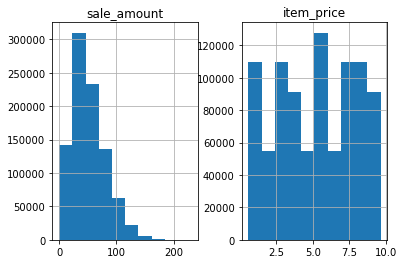

In [9]:
df.hist(['sale_amount','item_price'])

3. Set the index to be the datetime variable.

In [10]:
# this gives you a df resetting the index to date which has to
# happen first before resamlpling
df = df.set_index('sale_date').sort_index()
df.head()

,Unnamed: 0,item,sale_amount,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,level_0,index,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
sale_date,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,0,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,0,0.0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2013-01-01 00:00:00+00:00,211816,12,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,11,11.0,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211
2013-01-01 00:00:00+00:00,832656,46,27.0,832657,7,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,5,NaN,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664
2013-01-01 00:00:00+00:00,213642,12,54.0,213643,8,15000 San Pedro Ave,San Antonio,8,TX,78232,11,11.0,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211
2013-01-01 00:00:00+00:00,215468,12,35.0,215469,9,735 SW Military Dr,San Antonio,9,TX,78221,11,11.0,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211


4. Add a 'month' and 'day of week' column to your dataframe.

In [11]:
# adding a month column
df['month'] = df.index.strftime('%B')

In [12]:
# adding a day of the week column
df['day'] = df.index.strftime('%w')

In [13]:
df.head()

,Unnamed: 0,item,sale_amount,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,level_0,index,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,month,day
sale_date,,,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,0,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,0,0.0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,January,2
2013-01-01 00:00:00+00:00,211816,12,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,11,11.0,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,January,2
2013-01-01 00:00:00+00:00,832656,46,27.0,832657,7,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,5,NaN,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,January,2
2013-01-01 00:00:00+00:00,213642,12,54.0,213643,8,15000 San Pedro Ave,San Antonio,8,TX,78232,11,11.0,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,January,2
2013-01-01 00:00:00+00:00,215468,12,35.0,215469,9,735 SW Military Dr,San Antonio,9,TX,78221,11,11.0,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,January,2


In [14]:
# checking to see that it worked
df.columns

Index(['Unnamed: 0', 'item', 'sale_amount', 'sale_id', 'store',
       'store_address', 'store_city', 'store_id', 'store_state',
       'store_zipcode', 'level_0', 'index', 'item_brand', 'item_id',
       'item_name', 'item_price', 'item_upc12', 'item_upc14', 'month', 'day'],
      dtype='object')

In [15]:
df.head()

,Unnamed: 0,item,sale_amount,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,level_0,index,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,month,day
sale_date,,,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,0,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,0,0.0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,January,2
2013-01-01 00:00:00+00:00,211816,12,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,11,11.0,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,January,2
2013-01-01 00:00:00+00:00,832656,46,27.0,832657,7,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,5,NaN,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,January,2
2013-01-01 00:00:00+00:00,213642,12,54.0,213643,8,15000 San Pedro Ave,San Antonio,8,TX,78232,11,11.0,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,January,2
2013-01-01 00:00:00+00:00,215468,12,35.0,215469,9,735 SW Military Dr,San Antonio,9,TX,78221,11,11.0,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,January,2


5. Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [16]:
df['sales_total'] = df.sale_amount * df.item_price

In [17]:
df.head()

,Unnamed: 0,item,sale_amount,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,...,index,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,month,day,sales_total
sale_date,,,,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,0,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,...,0.0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,January,2,10.92
2013-01-01 00:00:00+00:00,211816,12,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,...,11.0,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,January,2,218.40
2013-01-01 00:00:00+00:00,832656,46,27.0,832657,7,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,...,NaN,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,January,2,125.55
2013-01-01 00:00:00+00:00,213642,12,54.0,213643,8,15000 San Pedro Ave,San Antonio,8,TX,78232,...,11.0,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,January,2,453.60
2013-01-01 00:00:00+00:00,215468,12,35.0,215469,9,735 SW Military Dr,San Antonio,9,TX,78221,...,11.0,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,January,2,294.00


6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [18]:
#fix this
def formatting(df):
    # converting sale_date to datetime format using to_datetime()
    df.sale_date = pd.to_datetime(df.sale_date)
    # this gives you a df resetting the index to date which has to
    df = df.set_index('sale_date').sort_index()
    # making a total sales column
    df['sales_total'] = df.sale_amount * df.item_price
    # adding a month column
    df['month'] = df.index.strftime('%B')
    # adding a day of the week column
    df['day'] = df.index.strftime('%w')
    return df

In [19]:
#### Next Section ######

Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:

1. Convert date column to datetime format

In [20]:
# here is how we read the csv and save it to a df
df = pd.read_csv('https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv')

In [21]:
# check out the df
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


2. Plot the distribution of each of your variables.

array([[<AxesSubplot:title={'center':'Consumption'}>,
        <AxesSubplot:title={'center':'Wind'}>],
       [<AxesSubplot:title={'center':'Solar'}>,
        <AxesSubplot:title={'center':'Wind+Solar'}>]], dtype=object)

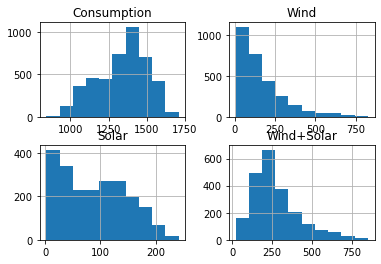

In [22]:
# plotting the distribution for each variable with a hist
df.hist()

3. Set the index to be the datetime variable.

In [23]:
df = df.set_index('Date').sort_index()
#df = df.set_index('sale_date').sort_index()

In [24]:
# check to make sure it worked
df.head(50)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN
2006-01-06,1403.427,NaN,NaN,NaN
2006-01-07,1300.287,NaN,NaN,NaN
2006-01-08,1207.985,NaN,NaN,NaN
2006-01-09,1529.323,NaN,NaN,NaN


4. Add a month and a year column to your dataframe.

In [25]:
df['month'] = df.index.strftime('%B')

AttributeError: 'Index' object has no attribute 'strftime'

5. Fill any missing values.

In [ ]:
df.shape

In [ ]:
# fill missing columns
df = df.fillna(0)

In [ ]:
# let's check to be sure wind+solar column is accurate to actual 
# wind and solar columns
df[df['Wind+Solar']!= (df['Wind'] + df['Solar'])]

In [ ]:
# create a custom column
df['wind_solar_custom'] != df['Wind']

6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [ ]:
# def formatting(df):
#     # converting sale_date to datetime format using to_datetime()
#     df.sale_date = pd.to_datetime(df.sale_date)
#     # this gives you a df resetting the index to date which has to
#     df = df.set_index('sale_date').sort_index()
#     # adding a month column
#     df['month'] = df.index.strftime('%B')
#     # adding a day of the week column
#     df['day'] = df.index.strftime('%w')
#     return df